<a href="https://colab.research.google.com/github/JUANCARLOST-LAB/Data-Science/blob/main/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [ ]:
#Importacion de librerias de utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv
url = "/content/drive/MyDrive/Data Science/Life_Expectancy.csv"
df = pd.read_csv(url)

In [ ]:
#Informacion del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Duplicados

In [ ]:
#Checamos si hay duplicados
df.duplicated().sum()

0

No contamos con duplicados

In [ ]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


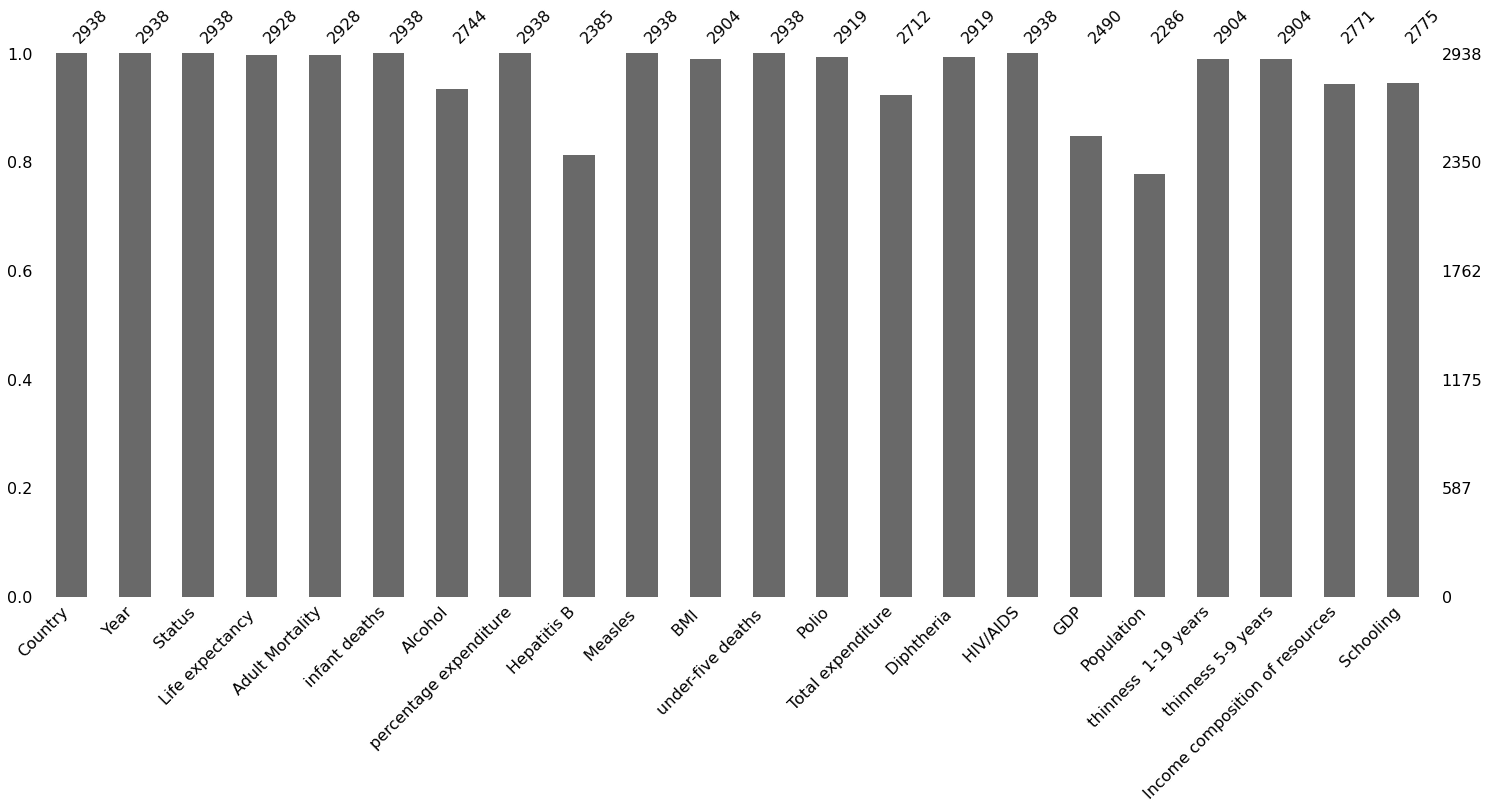

In [ ]:
#Analisis de cantidad de valores no nulos por columna
import missingno as msno
msno.bar(df)

Podemos notar que las columnas con mayor cantidad de nulos son la de Population, Hepatitis B, GDP y Alcohol.

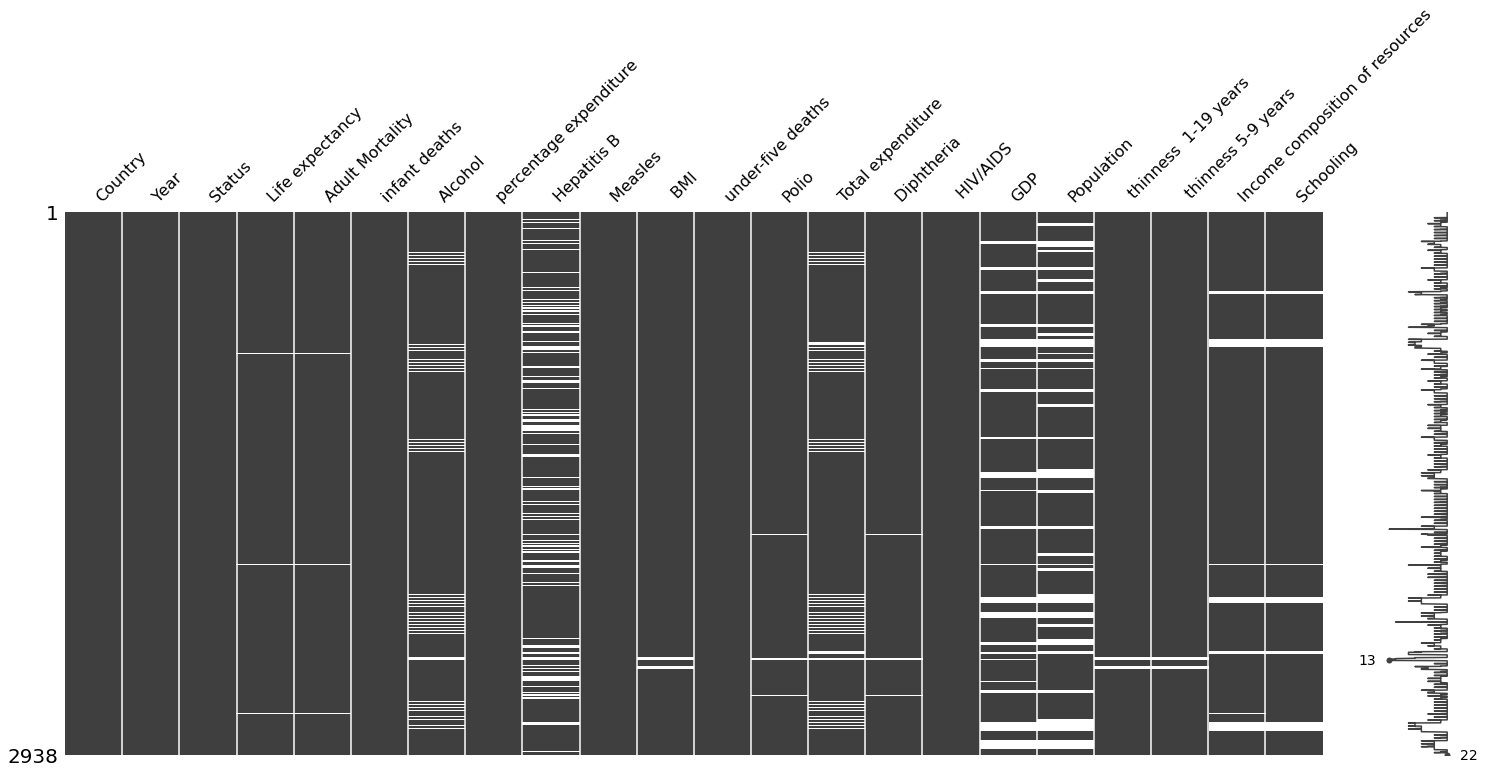

In [ ]:
#Analizamos correlacion de los nulos
msno.matrix(df)

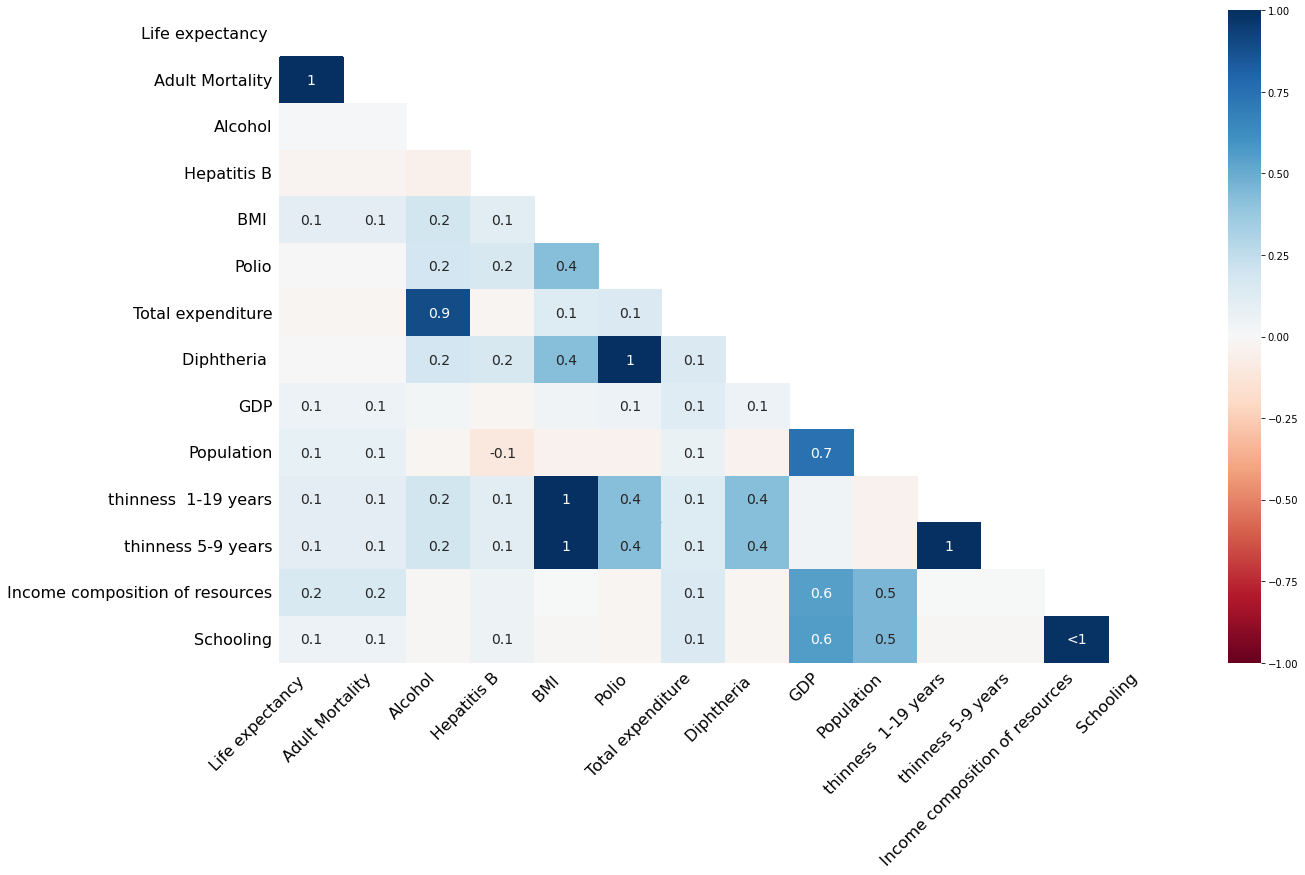

In [ ]:
#Realizamos heatmap de los nulos
msno.heatmap(df)

Podemos ver que las columnas con mayor correlacion de nulos son:
1. Adult Mortality con Life Expectancy
2. Diphteria con Polio
3. Total Expanditure con Alcohol
4. BMI con thiness
5. GDP con Schooling e ICR

Las demas correlaciones son bajas.

Miramos variables con una mayor cantidad de nulos y decidimos que hacer con ellas

In [ ]:
col_del = []
col_inter = []


# Variable Population

In [ ]:
#Para Population que tiene gran cantidad de nulos analizaremos el promedio de dicho pais
df_pop = df.groupby('Country').agg('mean')['Population']
print(df_pop)

Country
Afghanistan                           9.972260e+06
Albania                               6.969116e+05
Algeria                               2.164983e+07
Angola                                1.014710e+07
Antigua and Barbuda                            NaN
                                          ...     
Venezuela (Bolivarian Republic of)             NaN
Viet Nam                                       NaN
Yemen                                          NaN
Zambia                                6.260246e+06
Zimbabwe                              8.021343e+06
Name: Population, Length: 193, dtype: float64


In [ ]:
#Cantidad de nulos
df_pop.isnull().sum() #Son 48 nulos

48

In [ ]:
#Checamos cuales son los paises los cuales el promedio de su poblacion es nulo, para ver si es viable eliminar
#dichas filas y los demas nulos susituirlos por el promedio de dicho pais
df_pop = df_pop.reset_index()
null_countries = df_pop[df_pop['Population'].isnull()]['Country']
print(null_countries)

4                                    Antigua and Barbuda
10                                               Bahamas
11                                               Bahrain
13                                              Barbados
19                      Bolivia (Plurinational State of)
23                                     Brunei Darussalam
37                                                 Congo
38                                          Cook Islands
41                                                  Cuba
43                                               Czechia
44                                         Côte d'Ivoire
45                 Democratic People's Republic of Korea
46                      Democratic Republic of the Congo
49                                              Dominica
52                                                 Egypt
62                                                Gambia
67                                               Grenada
78                            I

In [ ]:
countries = pd.DataFrame(data=null_countries)
pd.merge(df,countries, on='Country', how='inner')
#Tenemos 648 filas en en las que el promedio de dicho pais es nulo, eliminarlas nos costaria muchos datos
#Por lo que eligiremos eliminar la columna Population

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.95410,NaN,3.3,3.3,0.784,13.9
1,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.29667,NaN,3.3,3.3,0.782,13.9
2,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.86416,NaN,3.3,3.3,0.781,13.9
3,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.44197,NaN,3.3,3.3,0.778,13.8
4,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.34991,NaN,3.3,3.3,0.782,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Yemen,2004,Developing,62.2,247.0,42,0.06,0.000000,43.0,12708,...,72.0,4.90,72.0,0.1,NaN,NaN,13.9,13.9,0.464,8.4
644,Yemen,2003,Developing,61.9,249.0,43,0.04,0.000000,38.0,8536,...,61.0,5.00,61.0,0.1,NaN,NaN,14.0,13.9,0.457,8.2
645,Yemen,2002,Developing,61.5,25.0,45,0.07,0.000000,31.0,890,...,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
646,Yemen,2001,Developing,61.1,251.0,46,0.08,0.000000,19.0,485,...,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9


In [ ]:
#Decision: Eliminar columna
col_del.append('Population')

# Variable Hepatitis B

In [ ]:
#Cantidad de valores nulos
df['Hepatitis B'].isnull().sum()

553

In [ ]:
df_hepb = df.groupby('Country').agg({'Hepatitis B': np.mean})
print(df_hepb)

                                    Hepatitis B
Country                                        
Afghanistan                           64.562500
Albania                               98.000000
Algeria                               78.000000
Angola                                70.222222
Antigua and Barbuda                   98.266667
...                                         ...
Venezuela (Bolivarian Republic of)    66.250000
Viet Nam                              87.538462
Yemen                                 55.687500
Zambia                                69.818182
Zimbabwe                              70.562500

[193 rows x 1 columns]


In [ ]:
#Checamos cuantos nulos tenemos
df_hepb.isnull().sum()

Hepatitis B    9
dtype: int64

In [ ]:
#Checamos cuales son los paises los cuales el promedio de su hepatitis B es nulo, para ver si es viable eliminar
#dichas filas y los demas nulos susituirlos por el promedio de dicho pais
df_hepb = df_hepb.reset_index()
null_countries = df_hepb[df_hepb['Hepatitis B'].isnull()]['Country']
print(null_countries)

47                                               Denmark
59                                               Finland
74                                               Hungary
75                                               Iceland
84                                                 Japan
125                                               Norway
155                                             Slovenia
166                                          Switzerland
182    United Kingdom of Great Britain and Northern I...
Name: Country, dtype: object


In [ ]:
countries = pd.DataFrame(data=null_countries)
pd.merge(df,countries, on='Country', how='inner')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Denmark,2015,Developed,86.0,71.0,0,NaN,0.000000,NaN,9,...,93.0,NaN,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
1,Denmark,2014,Developed,84.0,73.0,0,9.64,10468.762920,NaN,27,...,94.0,1.80,94.0,0.1,62425.53920,5643475.0,1.1,0.9,0.926,19.2
2,Denmark,2013,Developed,81.0,75.0,0,9.50,10261.763000,NaN,17,...,94.0,11.25,94.0,0.1,61191.19263,5614932.0,1.1,0.9,0.924,18.7
3,Denmark,2012,Developed,80.0,76.0,0,9.26,928.417079,NaN,2,...,94.0,1.98,94.0,0.1,5857.52100,5591572.0,1.1,0.9,0.922,18.4
4,Denmark,2011,Developed,79.7,79.0,0,10.47,10251.108720,NaN,84,...,91.0,1.87,91.0,0.1,61753.66700,557572.0,1.1,0.9,0.910,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,United Kingdom of Great Britain and Northern I...,2004,Developed,78.8,83.0,4,12.22,0.000000,NaN,189,...,92.0,7.98,92.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
140,United Kingdom of Great Britain and Northern I...,2003,Developed,78.3,86.0,4,11.85,0.000000,NaN,460,...,91.0,7.81,91.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
141,United Kingdom of Great Britain and Northern I...,2002,Developed,78.2,87.0,4,11.44,0.000000,NaN,314,...,91.0,7.57,91.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
142,United Kingdom of Great Britain and Northern I...,2001,Developed,78.0,88.0,4,10.91,0.000000,NaN,73,...,91.0,7.31,91.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN


In [ ]:
#Tenemos 144 filas, eliminariamos muchas filas entonces decidimos eliminar la columna
col_del.append('Hepatitis B')

# Variable GDP

In [ ]:
#Cantidad de valores nulos
df['GDP'].isnull().sum()

448

In [ ]:
#Ahora agruparemos por año
df_gdp = df.groupby('Year').agg({'GDP': np.mean})
print(df_gdp)

               GDP
Year              
2000   4708.515191
2001   4854.527638
2002   4599.303043
2003   4774.835677
2004   7055.889709
2005   7249.787557
2006   7347.033143
2007   8537.243114
2008  10604.040364
2009   7060.615022
2010   7464.487887
2011   9685.908944
2012  10378.875046
2013   8152.675657
2014  10015.568494
2015   7185.331746


In [ ]:
df_gdp.isnull().sum()

GDP    0
dtype: int64

In [ ]:
#Tenemos 0 nulos entonces modificaremos con el promedio del gdp del año
df_gdp = df_gdp.reset_index()
#Creamos diccionario a base de los años y sus promedios
dict_gdp = dict(zip(np.array(df_gdp['Year']), np.array(df_gdp['GDP'])))

In [ ]:
#Los 'Nan' los reemplazamos con np.nan
df.GDP.replace('Nan', np.nan)

#Mapeamos los np.nan y reemplazamos por el valor en el diccionary
df.loc[df['GDP'].isnull(),'GDP'] = df['Year'].map(dict_gdp)

In [ ]:
#Verificamos que no haya nulos
df['GDP'].isnull().sum()

0

Ahora eliminaremos las columnas pendientes

In [ ]:
train_x = df.drop(labels=col_del, axis=1)

In [ ]:
#Columnas que quedaron
train_x.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#Las demas columnas que no tenian tantos nulos las llenaremos con el promedio de todos
train_x = train_x.fillna(train_x.mean)

In [ ]:
#Verificamos que ya no queden nulos
train_x.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64